In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\dhara\\Downloads\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [5]:
df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Percentage of total not fraud transaction

In [9]:
nfcount=0
notFraud=df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount=nfcount+1
per_nf=(nfcount/len(notFraud))*100
print("percentage of total not fraud transaction in the dataset:",per_nf)

percentage of total not fraud transaction in the dataset: 99.82725143693798


### Percentage of total fraud transaction

In [12]:
fcount=0
Fraud=df['Class']
for i in range(len(Fraud)):
    if Fraud[i]==1:
        fcount=fcount+1
per_f=(fcount/len(Fraud))*100
print("percentage of total fraud transaction in the dataset:",per_f)

percentage of total fraud transaction in the dataset: 0.1727485630620034


In [13]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<Axes: title={'center': 'Bar plot for Fraud vs Genuine Transactions '}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

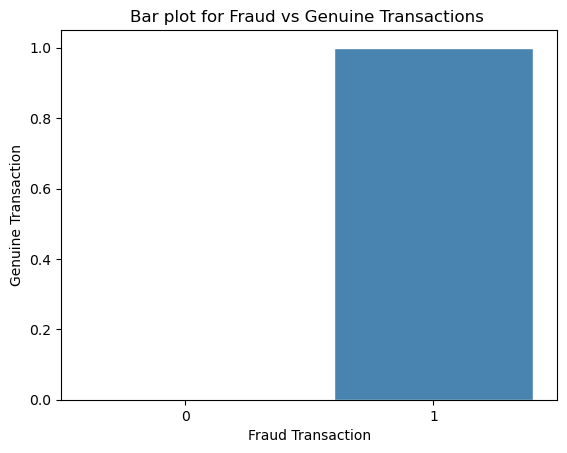

In [14]:
plt.title("Bar plot for Fraud vs Genuine Transactions ")
sns.barplot(x='Fraud Transaction',y='Genuine Transaction',data=plot_data,palette='Blues',edgecolor='w')

### as per the graph,we can say that genuine transactions are higher than fraud transactions.

Text(0.5, 1.0, 'Time vs Amount')

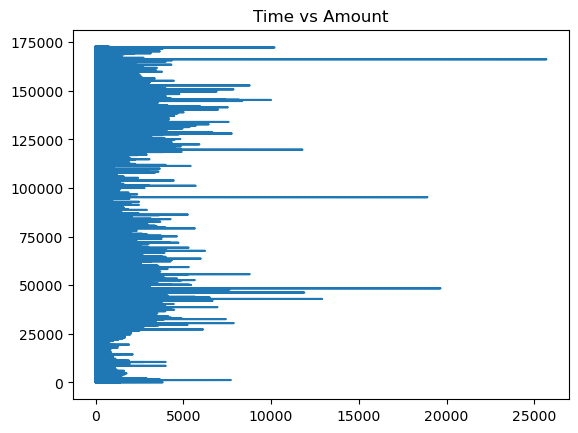

In [15]:
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')


### we try to plot the relationship between time and amount

C:\Users\dhara\AppData\Local\Temp\ipykernel_12604\3905131333.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],color='red')


<Axes: title={'center': 'Amount of Distribution'}, xlabel='Amount', ylabel='Density'>

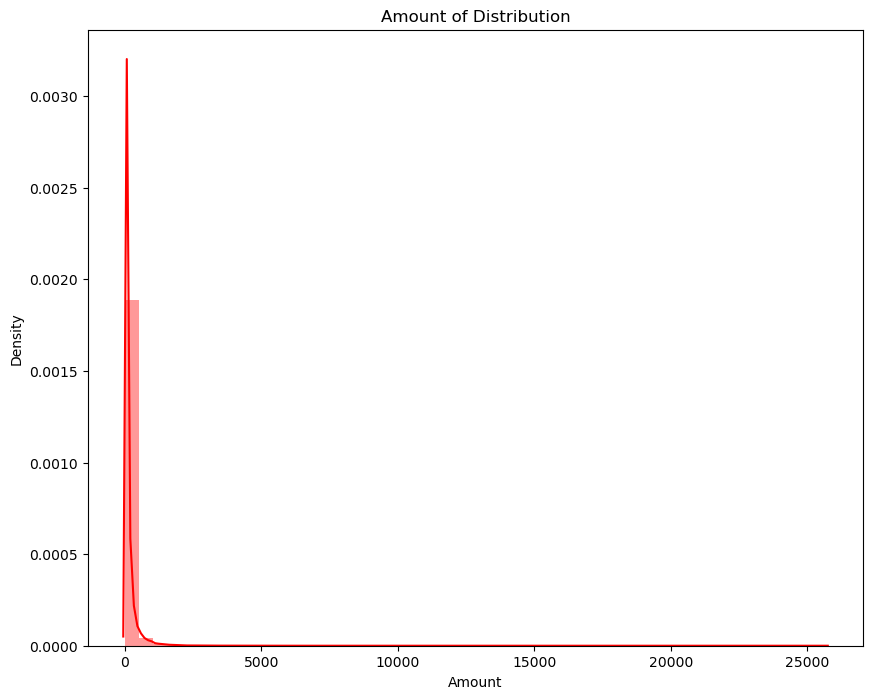

In [17]:
plt.figure(figsize=(10,8))
plt.title('Amount of Distribution')
sns.distplot(df['Amount'],color='red')

### from this graph,it shows that high amount transactions are very low.so there is a high probability for huge transactions to be fraudulent

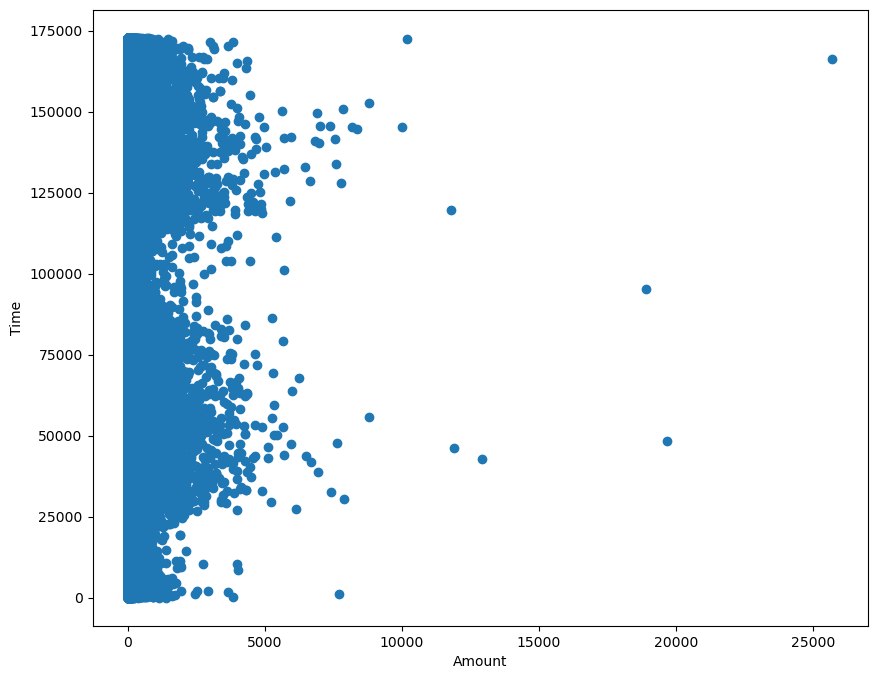

In [18]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(df['Amount'],df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

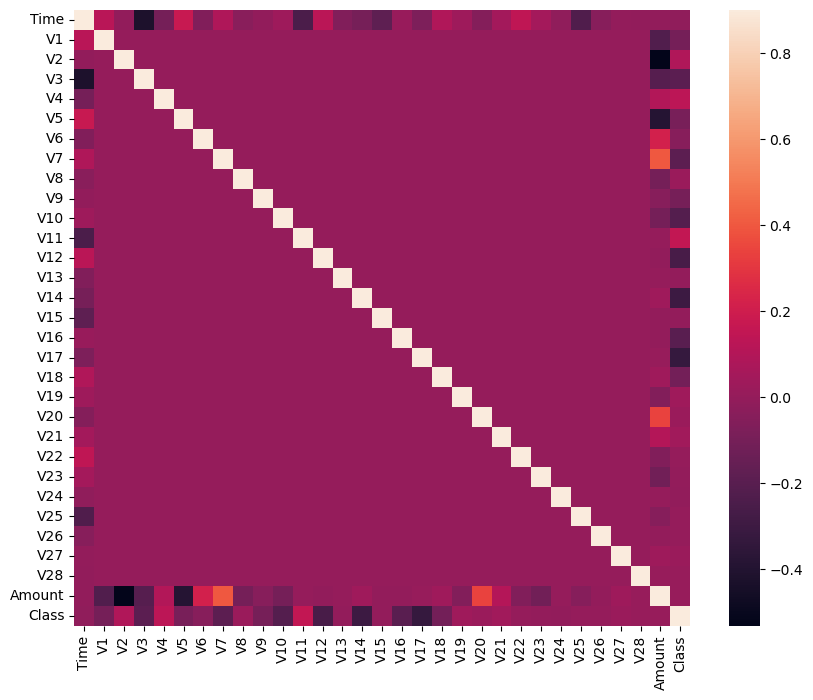

In [21]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,vmax=.9,square=True)
plt.show()

In [22]:
x=df.drop(['Class'],axis=1)
y=df['Class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\dhara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
accuracy=model.score(xtest,ytest)
accuracy

0.9986306660580738

In [28]:
y_pred=model.predict(xtest)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## confusion matrix

#### Positive(P) : observation is positive
#### Negative(N) : observation is negative
#### True positive(TP) :observation is positive and is predicted to be positive
#### False Negative(FN) :observation is positive and is predicted to be negative
#### True Negative(TN) :observation is negative and is predicted to be negative
#### False positive(FP) :observation is negative and is predicted to be positive

In [29]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[56829,    35],
       [   43,    55]], dtype=int64)

In [35]:
print('Accuracy score of the logistic regression model:',accuracy*100,'%')

Accuracy score of the logistic regression model: 99.86306660580738 %
